# Tutorial 9: SHAP Analysis for Classification Tasks

## Introduction
In this tutorial, we will explore the SHAP (SHapley Additive exPlanations) library for interpreting machine learning models. SHAP is a popular tool for understanding the impact of individual features on the model's predictions. This tutorial will guide you through different examples of using SHAP to interpret classification models.

### Key Points of the Tutorial:
- Install SHAP and Required Libraries
- Load a Sample Dataset
- Train a Classification Model
- Use SHAP to Interpret the Model

## Setup
First, let's install SHAP and other necessary libraries:
```bash
!pip install shap
```

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

## Analysis on Breast Cancer Dataset
For this tutorial, we will use the Breast Cancer dataset from scikit-learn. This dataset is commonly used for classification tasks.


In [2]:
from sklearn.datasets import load_breast_cancer
# Load the Breast Cancer dataset
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

Number of Instances: 569 

Number of Attributes: 30 numeric, predictive attributes and the class

Attribute Information:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension (“coastline approximation” - 1)

The mean, standard error, and “worst” or largest (mean of the three worst/largest values) of these features were computed for each image, resulting in 30 features. For instance, field 0 is Mean Radius, field 10 is Radius SE, field 20 is Worst Radius.
- diagnosis:
    - WDBC-Malignant
    - WDBC-Malignant

In [3]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [5]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Train different Classification Models

### We will train a KNeighborsClassifier on the dataset to demonstrate SHAP analysis.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [7]:
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score
# evaluate the performance of knn on the test dataset
print(balanced_accuracy_score(y_test, knn.predict(X_test)))
print(f1_score(y_test, knn.predict(X_test)))
print(roc_auc_score(y_test, knn.predict_proba(X_test)[:,1]))

0.9246031746031746
0.9444444444444444
0.9619708994708994


#### Explain a single prediction from the test set

In [8]:
shap.initjs()
explainer = shap.KernelExplainer(knn.predict_proba, X_train)
shap_values = explainer.shap_values(X_test.iloc[0, :])
shap.force_plot(explainer.expected_value[0], shap_values[:, 0], X_test.iloc[0, :])

Using 455 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


#### Explain all the predictions in the test set

In [9]:
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[..., 0], X_test)

  0%|          | 0/114 [00:00<?, ?it/s]

### Logistic Regression with SHAP analysis

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="newton-cg")
lr.fit(X_train, y_train)
print(balanced_accuracy_score(y_test, lr.predict(X_test)))
print(f1_score(y_test, lr.predict(X_test)))
print(roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

0.9573412698412699
0.9726027397260274
0.9953703703703703


In [11]:
# explain all the predictions in the test set
explainer = shap.KernelExplainer(lr.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[..., 0], X_test)

Using 455 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/114 [00:00<?, ?it/s]

### RandomForestClassifier with SHAP analysis.

In [12]:
from sklearn.ensemble import RandomForestClassifier
# Train a RandomForest model
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

print(balanced_accuracy_score(y_test, rf.predict(X_test)))
print(f1_score(y_test, rf.predict(X_test)))
print(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

0.9503968253968254
0.9655172413793104
0.9933862433862434


In [13]:
# explain all the predictions in the test set
explainer = shap.KernelExplainer(rf.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[..., 0], X_test)

Using 455 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/114 [00:00<?, ?it/s]

## Diabetes Regression with SHAP Analysis

In [40]:
# load the dataset
from sklearn.datasets import load_diabetes
Xd, yd = load_diabetes(return_X_y=True, as_frame=True)

In [41]:
Xd.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


Features `X`
- age (float): Age in years
- sex (float): Sex
- bmi (float): Body mass index
- bp (float): Average blood pressure
- s1 (float): Total serum cholesterol
- s2 (float): Low-density lipoproteins (LDL cholesterol)
- s3 (float): High-density lipoproteins (HDL cholesterol)
- s4 (float): Total cholesterol / HDL cholesterol ratio
- s5 (float): Log of serum triglycerides level
- s6 (float): Blood sugar level

In [42]:
yd.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

Target `y`
- Progression of diabetes one year after baseline (float)

In [43]:
# split the dataset
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size=0.2, random_state=42)

In [44]:
# rather than use the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
Xd_train_summary = shap.kmeans(Xd_train, 10)

shap.initjs()

c:\Users\liyan\anaconda3\envs\graphical-ts\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


### Linear Regression with SHAP

In [45]:
from sklearn.linear_model import LinearRegression

lin_regr = LinearRegression()
lin_regr.fit(Xd_train, yd_train)

LinearRegression()

In [46]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
print(root_mean_squared_error(yd_test, lin_regr.predict(Xd_test)))
print(mean_absolute_error(yd_test, lin_regr.predict(Xd_test)))
print(mean_absolute_percentage_error(yd_test, lin_regr.predict(Xd_test)))

53.85344583676592
42.79409467959994
0.3749982636756112


#### Explain a single prediction from the test set

In [47]:
ex = shap.KernelExplainer(lin_regr.predict, Xd_train_summary)
shap_values = ex.shap_values(Xd_test.iloc[0, :])
shap.force_plot(ex.expected_value, shap_values, Xd_test.iloc[0, :])

#### Explain all the predictions in the test set

  0%|          | 0/89 [00:00<?, ?it/s]

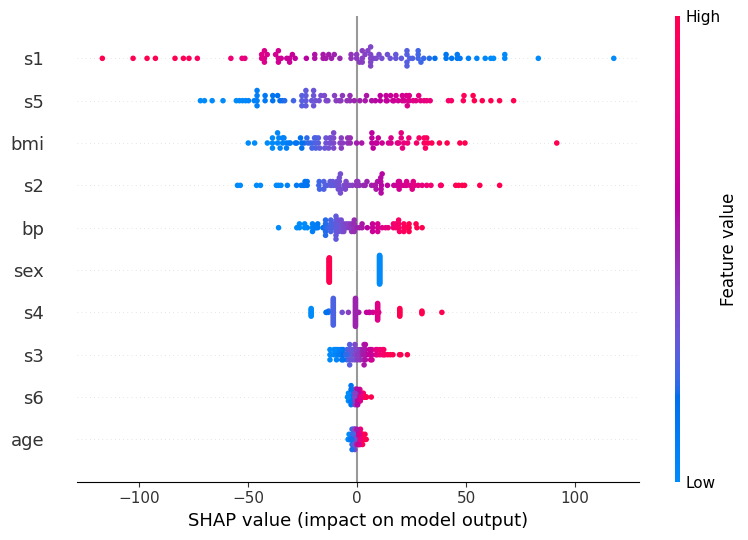

In [16]:
shap_values = ex.shap_values(Xd_test)
shap.summary_plot(shap_values, Xd_test)

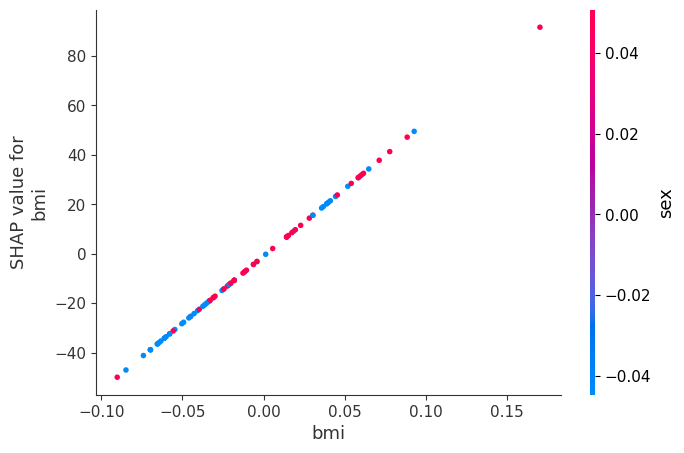

In [17]:
shap.dependence_plot("bmi", shap_values, Xd_test)

In [18]:
shap.force_plot(ex.expected_value, shap_values, Xd_test)

### Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor

rforest = RandomForestRegressor(n_estimators=1000, max_depth=5, min_samples_split=2, random_state=0)
rforest.fit(Xd_train, yd_train)

RandomForestRegressor(max_depth=5, n_estimators=1000, random_state=0)

In [20]:
print(root_mean_squared_error(yd_test, rforest.predict(Xd_test)))
print(mean_absolute_error(yd_test, rforest.predict(Xd_test)))
print(mean_absolute_percentage_error(yd_test, rforest.predict(Xd_test)))

53.29800426467375
43.20232614798002
0.39228502037739843


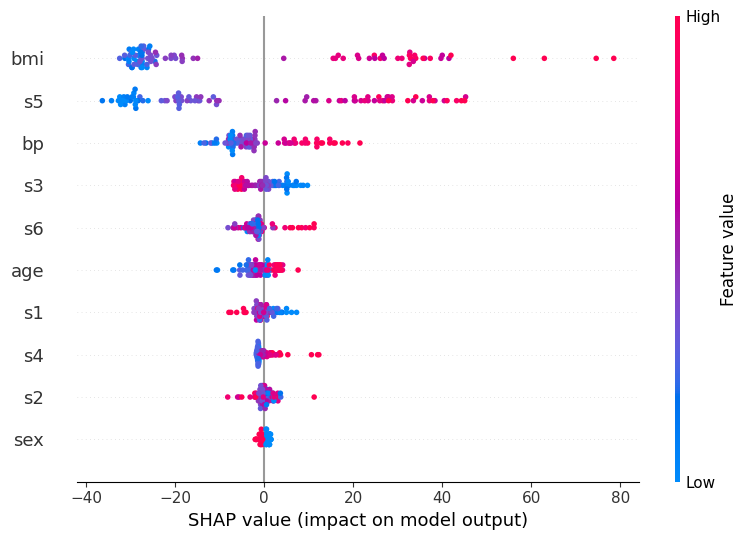

In [21]:
# explain all the predictions in the test set
explainer = shap.TreeExplainer(rforest)
shap_values = explainer.shap_values(Xd_test)
shap.summary_plot(shap_values, Xd_test)

In [ ]:
shap.dependence_plot("bmi", shap_values, Xd_test)

In [23]:
shap.force_plot(explainer.expected_value, shap_values, Xd_test)

## Exercise
### Can you do the SHAP analysis with Neural Network on Breast Cancer dataset and Diabetes dataset respectively?

In [ ]:
from sklearn.neural_network import MLPClassifier, MLPRegressor